# Biopython


Biopython is a set of freely available tools for biological computation written in Python by an international team of developers. It is a distributed, collaborative effort to develop Python libraries and applications that address the needs of current and future work in bioinformatics. 

In this notebook, we will learn how to use Biopython to perform various tasks such as reading and writing sequence files, searching and retrieving sequences from databases, and performing multiple sequence alignments.


## 1. Sequence Searching and Retrieval from databases

In this section, we’ll learn how to search for and retrieve biological sequences using Biopython. We'll explore various databases and the functions available for accessing them.

To perform sequence searching and retrieval, we need to import specific modules from Biopython. These modules include:

In [2]:
from Bio import Entrez
from Bio import SeqIO

### NCBI data retreival

Suppose you want to download some nucleotide sequences from NCBI.

https://www.ncbi.nlm.nih.gov/nucleotide/

The search term `"zea mays subsp mays"[Organism] AND tb1[Gene Name]` gives you about 247 entries (as of 04-11-2024). Manually searching, downloading, editing, and importing each of these entries into Python would be time-consuming and inefficient.

Fortunately, this entire process can be streamlined using the Entrez module from Biopython.

Let’s walk through an example:

First, set up *your* email address for NCBI:

In [4]:
Entrez.email = "corrinne@iastate.edu" # please use your own!

In [24]:
handle = Entrez.esearch(db="nucleotide", # what database to search
                        term='"zea mays subsp mays"[Organism] AND tb1[Gene Name]', # organism and gene name
                        retmax=500) # how many results to return
record = Entrez.read(handle) # read through the results from entrez
handle.close() # close the connection to handle and free up resources
print("Total records:", record['Count']) # print how many records are returned

Total records: 247


The `record` object is a dictionary containing the Entrez IDs that match our search and some other information

In [27]:
print(record.keys()) # what keys are in the dictionary record

dict_keys(['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation'])


In [8]:
print("Matching IDs:", record["IdList"]) # here we print only those matching IDs

Matching IDs: ['1810959207', '1810959197', '1810959195', '1810959193', '1810959191', '1810959189', '16305499', '16305498', '16305496', '16305494', '16305492', '16305490', '16305489', '16305487', '16305485', '16305483', '16305481', '16305479', '16305477', '16305475', '16305474', '16305472', '16305470', '16305468', '16305466', '16305464', '16305462', '16305461', '16305459', '16305457', '16305455', '16305454', '16305452', '16305451', '16305449', '16305448', '16305446', '16305444', '16305442', '16305441', '16305439', '16305437', '16305435', '16305433', '16305431', '16305430', '16305428', '16305426', '16305425', '16305423', '16305421', '16305419', '16305418', '16305416', '16305414', '16305413', '16305411', '16305409', '16305407', '16305406', '16305404', '16305403', '16305401', '16305400', '16305398', '16305397', '16305395', '16305394', '16305392', '16305391', '16305389', '16305388', '16305386', '16305385', '16305383', '16305381', '16305380', '16305378', '16305377', '16305375', '16305373', '

In [28]:
record["IdList"][0:5] # just the first 5 IDs

['1810959207', '1810959197', '1810959195', '1810959193', '1810959191']

So great, but how do we *get* those sequences to work with them? Here, we can use `Entrez.efetch` within a `for` loop and then use the biopython `SeqIO.read` to read the results. Here we will just use the first sequence as an example.

In [29]:
for seq_id in record["IdList"][0:1]:
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text") # get this id as fasta from nt
    seq_record = SeqIO.read(handle, "fasta") # use SeqIO to read this sequence record
    print(seq_record.id, ":", seq_record.description)
    print(seq_record.seq)
    handle.close()

MN842306.1 : MN842306.1 Zea mays subsp. mays cultivar CML425 teosinte branched 1 (tb1) gene, complete cds
GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGATGGGTAACCATAGTTAATAATGCACTGGATCTATCACTACTCATACAGGTCCCATATGCCTAATAATGTTGTGAAGACCAACTCATCTGACCACATCTGTCCCTACCATGCTTGTACACCACACTACATACATCACTCATCACTGGTCCTTCGTTTCGGTACCCTCCTCCCACAATGTTCAATGTATATACTAATAGTTCTCAAATAAATTCCTGTGGATGTTACAAAAACCCACGGTCTTTGGTTTCCTGAAGAAGTATTTCATGGAGGCGCGCACGTCCATCGTACTGCGTCCTGCAGCTATGGCCGCCCCCATCTGGCCAATAAATGTACTAGGTCACTTGTAGCCAATAGCGTTTCAACATGCACACAGCTTTTCCCCCAATAGTGCAGGTCCTTGTATTCTCCTCCCTCCCTCACCTCAAATCTCATCCACACGAACAGGCGGCACGGCAGTATTCCTCCACAGCCCTCCTCTCTATAAGATGGCACAGCCCTCTCAGGTAGGGGCGAGTGTCTCACTCTCACATAGTAAAAAAAAAAAAACCCCCCCAGGGTTTTTAAGCACAATTCTTTAGCTTTTTGGGTCCCCTACCCAGCCTATGCACATGACCCCTTGCCTCTCCCCTCCTTGGGCCGGGAAAAAGGGGGGGTTTAATCACCTGGAAAGTTTTTAACTCTCTCTCTCTCTCTCTCTCTCTCTCTTACAAGCCTAGACCTTATGCATGGTCGGACGGACACATCTGATCATAGGACATATGAGTAGGCCACACTCCTCCTGCCCCTCTCTCGTAGAGATCAACACACACTGCTCTTAGTGCCAGGACCTAGAGAGGGGAGC

You can always find documentation using `help`

In [11]:
help(Entrez.efetch)

Help on function efetch in module Bio.Entrez:

efetch(db, **keywords)
    Fetch Entrez results which are returned as a handle.

    EFetch retrieves records in the requested format from a list or set of one or
    more UIs or from user's environment.

    See the online documentation for an explanation of the parameters:
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch

    Short example:

    >>> from Bio import Entrez
    >>> Entrez.email = "Your.Name.Here@example.org"
    >>> handle = Entrez.efetch(db="nucleotide", id="AY851612", rettype="gb", retmode="text")
    >>> print(handle.readline().strip())
    LOCUS       AY851612                 892 bp    DNA     linear   PLN 10-APR-2007
    >>> handle.close()

    This will automatically use an HTTP POST rather than HTTP GET if there
    are over 200 identifiers as recommended by the NCBI.

    **Warning:** The NCBI changed the default retmode in Feb 2012, so many
    databases which previously returned text output now giv

In [30]:
seq_records = []

for seq_id in record["IdList"]: # get them all and save them to a list
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    seq_records.append(seq_record)
    handle.close()

print(f"Retrieved {len(seq_records)} sequences.")

Retrieved 247 sequences.


In [31]:
seq_records

[SeqRecord(seq=Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...ATA'), id='MN842306.1', name='MN842306.1', description='MN842306.1 Zea mays subsp. mays cultivar CML425 teosinte branched 1 (tb1) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...ATA'), id='MN842301.1', name='MN842301.1', description='MN842301.1 Zea mays subsp. mays cultivar BML7 teosinte branched 1 (tb1) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...ATA'), id='MN842300.1', name='MN842300.1', description='MN842300.1 Zea mays subsp. mays cultivar MGUSP101 teosinte branched 1 (tb1) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...ATA'), id='MN842299.1', name='MN842299.1', description='MN842299.1 Zea mays subsp. mays cultivar HKI1128 teosinte branched 1 (tb1) gene, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('GACATTTTCTACCTA

### Searching UniProt Database


Likewise, UniProt, a protein sequence and functional information database, is compatible with biopython to  retreive sequences. The same gene `TB1_MAIZE` is found here

https://www.uniprot.org/uniprotkb/Q93WI2/entry

and using the id `Q93WI2` you can download the sequence as follows:

In [32]:
from Bio import ExPASy
from Bio import SwissProt

handle = ExPASy.get_sprot_raw("Q93WI2")
record = SwissProt.read(handle)
print("Protein Name:", record.description)
print("Organism:", record.organism)
print("Sequence Length:", len(record.sequence))
print("Sequence:", record.sequence)
handle.close()

Protein Name: RecName: Full=Transcription factor TEOSINTE BRANCHED 1;
Organism: Zea mays (Maize).
Sequence Length: 376
Sequence: MFPFCDSSSPMDLPLYQQLQLSPSSPKTDQSSSFYCYPCSPPFAAADASFPLSYQIGSAAAADATPPQAVINSPDLPVQALMDHAPAPATELGACASGAEGSGASLDRAAAAARKDRHSKICTAGGMRDRRMRLSLDVARKFFALQDMLGFDKASKTVQWLLNTSKSAIQEIMADDASSECVEDGSSSLSVDGKHNPAEQLGGGGDQKPKGNCRGEGKKPAKASKAAATPKPPRKSANNAHQVPDKETRAKARERARERTKEKHRMRWVKLASAIDVEAAAASGPSDRPSSNNLSHHSSLSMNMPCAAAELEERERCSSALSNRSAGRMQEITGASDVVLGFGNGGGGYGDGGGNYYCQEQWELGGVVFQQNSRFY


In [33]:
dir(record) # what are the attributes and methods of record

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accessions',
 'annotation_update',
 'comments',
 'created',
 'cross_references',
 'data_class',
 'description',
 'entry_name',
 'features',
 'gene_name',
 'host_organism',
 'host_taxonomy_id',
 'keywords',
 'molecule_type',
 'organelle',
 'organism',
 'organism_classification',
 'protein_existence',
 'references',
 'seqinfo',
 'sequence',
 'sequence_length',
 'sequence_update',
 'taxonomy_id']

### Searching PDB Database

PDB database is a repository for 3D structural data of large biological molecules, such as proteins, DNA and RNA. You can search for a protein structure using the protein name or the PDB ID.

The database is accessible at: https://www.rcsb.org/

For example, to search for the structure of the protein `1A8O` you can use the following code:

In [15]:
# Import PDBList
from Bio.PDB import PDBList

# Initialize PDBList object
pdb_list = PDBList()

# Download PDB file with ID '1A8O'
pdb_list.retrieve_pdb_file('1A8O', file_format='pdb')

Structure exists: '/ptmp/LAS/jfw-lab/corrinne/BCB546_Spring2025/python/a8/pdb1a8o.ent' 


'/ptmp/LAS/jfw-lab/corrinne/BCB546_Spring2025/python/a8/pdb1a8o.ent'

Apart from the the 3 examples shown above, Biopython can also retrieve sequences from other databases such as `KEGG`,  `SCOP`, `PubMed`, `Prosite`, `SwissProt`, `GeneBank`, among others. But for the sake of brevity, we will not cover them here.

## Parsing BLAST results

In our above example, we were interested in a single gene in a single species. But what if we have a sequence (or many) that we want to match against NCBI? For this example, we might want to functionally annotate a genome annotation we just completed. Here, we will use that as an example. Here, a protein BLAST (blastp) of all _Zea mays_ subspp. _mays_ (B73) proteins was run against SwissProt. Here, the results are in *XML format*. Following commands were used:

```bash
# create blastDB
makeblastdb \
   -in uniprot-sprot_viridiplantae.fasta \
   -dbtype prot
# run BLASTp
blastp \
   -max_target_seqs 5 \
   -outfmt 5 \
   -num_threads $SLURM_CPUS_ON_NODE \
   -query BCB546_Spring2024/course-files/blast_dataset/zm_pep.fa \
   -db uniprot-sprot_viridiplantae.fasta \
   -evalue 0.000001 > blast_output.xml
```

First, we need to load relevant libraries and parse the results.

In [34]:
from Bio.Blast import NCBIXML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We will use the pre-computed blast results for this excerise. The file is named `blast_output.xml` and is located in the `course-files/blast_dataset` directory.

In [17]:
blastoutput = 'blast_output.xml'

Now, we can parse the XML file using the NCBIXML module from the Bio.Blast package. The Bio.Blast.NCBIXML module in Biopython is used to parse BLAST output files in XML format. It turns the XML into Python objects that are easy to work with, so you can extract information like query IDs, hit descriptions, E-values, alignments, etc.

In this loop, we are iterating over each alignment in the blast record and printing the alignment title, the length of the alignment, and the e-value of the alignment.

This is just to provide a template, but can be modified to do other things such as extracting the sequences, computing best matching sequences, etc.

In [35]:
with open(blastoutput) as result_handle: # open blastoutput as an object result_handle
    blast_records = NCBIXML.parse(result_handle) # parse the contents of result_handle into blast_records
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            print("Sequence ID:", alignment.title)
            for hsp in alignment.hsps:
                print("Alignment Length:", hsp.align_length)
                print("E-value:", hsp.expect)
                print("Bit Score:", hsp.score)
                print("Identity:", hsp.identities)

Sequence ID: sp|P20027|MYB3_HORVU Myb-related protein Hv33 OS=Hordeum vulgare OX=4513 GN=MYB2 PE=2 SV=3
Alignment Length: 108
E-value: 7.41799e-49
Bit Score: 414.0
Identity: 73
Sequence ID: sp|Q8LPH6|MYB86_ARATH Transcription factor MYB86 OS=Arabidopsis thaliana OX=3702 GN=MYB86 PE=2 SV=1
Alignment Length: 118
E-value: 5.35337e-47
Bit Score: 405.0
Identity: 73
Sequence ID: sp|Q8VZQ2|MYB61_ARATH Transcription factor MYB61 OS=Arabidopsis thaliana OX=3702 GN=MYB61 PE=2 SV=1
Alignment Length: 118
E-value: 1.02684e-46
Bit Score: 404.0
Identity: 75
Sequence ID: sp|Q9LXV2|MYB46_ARATH Transcription factor MYB46 OS=Arabidopsis thaliana OX=3702 GN=MYB46 PE=2 SV=1
Alignment Length: 109
E-value: 8.1701e-45
Bit Score: 385.0
Identity: 69
Sequence ID: sp|Q7XBH4|MYB4_ORYSJ Transcription factor MYB4 OS=Oryza sativa subsp. japonica OX=39947 GN=MYB4 PE=2 SV=2
Alignment Length: 109
E-value: 3.30416e-41
Bit Score: 359.0
Identity: 63
Sequence ID: sp|Q9SEI0|WER_ARATH Transcription factor WER OS=Arabidopsis t

Sequence ID: sp|P49237|E13B_MAIZE Glucan endo-1,3-beta-glucosidase, acidic isoform OS=Zea mays OX=4577 PE=2 SV=1
Alignment Length: 340
E-value: 7.35792e-139
Bit Score: 1020.0
Identity: 220
Sequence ID: sp|P15737|E13B_HORVU Glucan endo-1,3-beta-glucosidase GII OS=Hordeum vulgare OX=4513 PE=1 SV=1
Alignment Length: 340
E-value: 2.11469e-111
Bit Score: 838.0
Identity: 188
Sequence ID: sp|O22317|E13C_MUSAC Glucan endo-1,3-beta-glucosidase OS=Musa acuminata OX=4641 GN=BANGLUC PE=1 SV=2
Alignment Length: 345
E-value: 4.67654e-110
Bit Score: 830.0
Identity: 184
Sequence ID: sp|Q02438|E13E_HORVU Glucan endo-1,3-beta-glucosidase GV OS=Hordeum vulgare OX=4513 PE=2 SV=2
Alignment Length: 314
E-value: 2.50406e-104
Bit Score: 790.0
Identity: 174
Sequence ID: sp|P07979|GUB_NICPL Lichenase OS=Nicotiana plumbaginifolia OX=4092 GN=GN1 PE=2 SV=3
Alignment Length: 348
E-value: 4.1077e-103
Bit Score: 787.0
Identity: 171
Sequence ID: sp|P12257|GUB2_HORVU Lichenase-2 (Fragment) OS=Hordeum vulgare OX=4513 PE

The BLAST output data can also be used to create a Pandas DataFrame for further analysis and visualization. Let's extract the relevant information from the BLAST results that we’ll need for plotting.

In [36]:
with open(blastoutput) as result_handle:
    blast_records = NCBIXML.parse(result_handle)

    # Initialize an empty dictionary to store hit counts for each query
    query_hit_counts = {}

    for blast_record in blast_records:
        query_id = blast_record.query     # Get the query ID
        if blast_record.alignments:       # Check if there are any hits for the query
            hit_count = len(blast_record.alignments) # Count the number of hits for the query
            query_hit_counts[query_id] = hit_count # Update hit count for the query

# Convert the dictionary into lists for plotting
queries = list(query_hit_counts.keys())
hit_counts = list(query_hit_counts.values())

We can now create a bar plot to visualize the number of hits for each query:

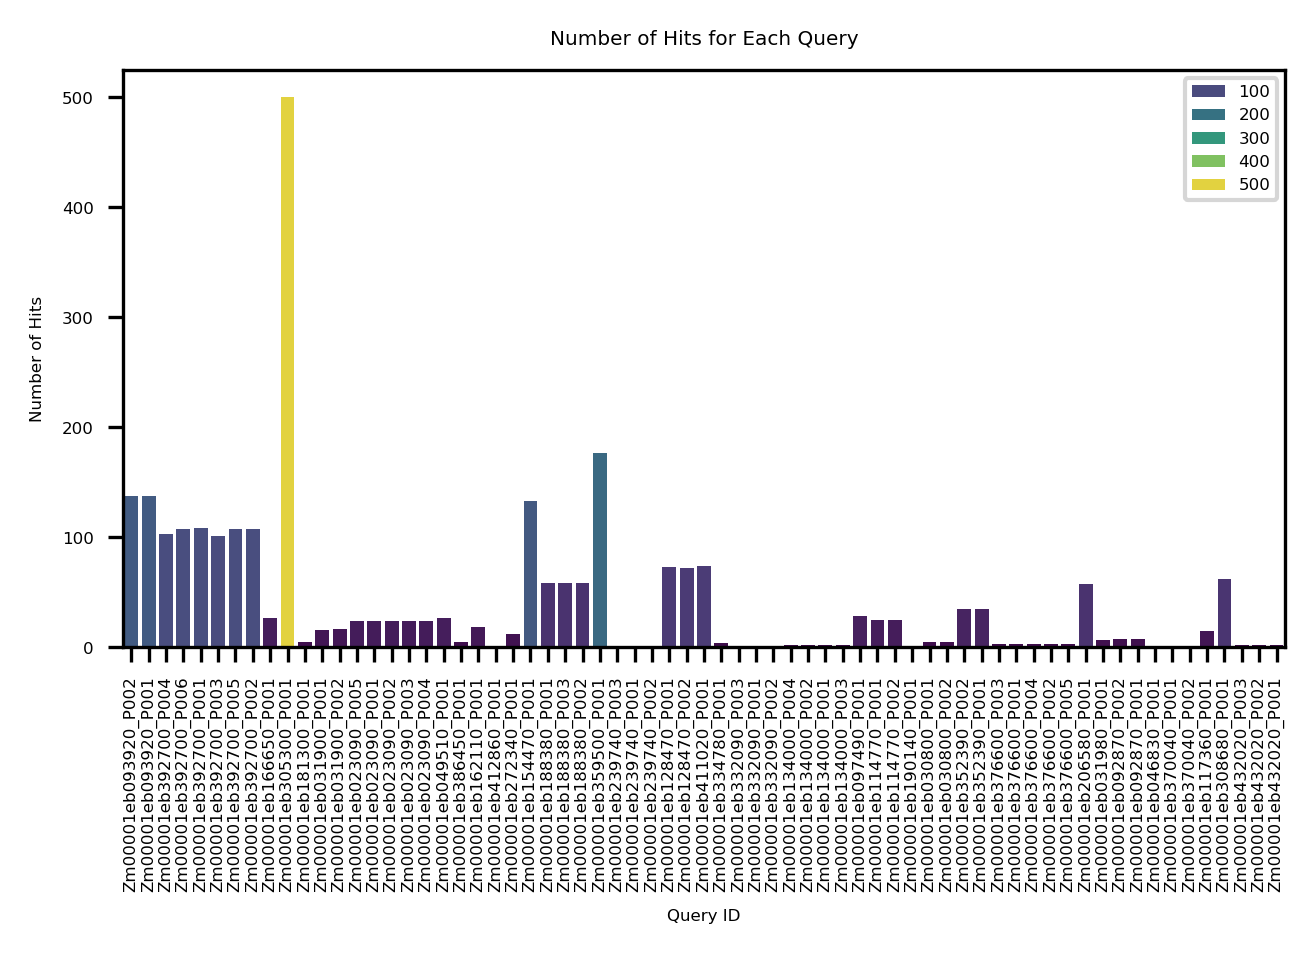

In [37]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5,2.5
plt.rcParams.update({'font.size': 4})

sns.barplot(x=queries, y=hit_counts, hue = hit_counts , palette="viridis")
plt.xlabel("Query ID")
plt.ylabel("Number of Hits")
plt.title("Number of Hits for Each Query")
plt.xticks(rotation=90)
plt.show()

Here is another example to print the alignments in a tabular format:

In [38]:
with open(blastoutput) as result_handle:
    blast_records = NCBIXML.parse(result_handle)
    
    alignments = []

    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                alignments.append({
                    "Query ID": blast_record.query,
                    "Subject ID": alignment.hit_id,
                    "Alignment Length": hsp.align_length,
                    "E-value": hsp.expect,
                    "Bit Score": hsp.score,
                    "Query Alignment": hsp.query,
                    "Subject Alignment": hsp.sbjct   })
                
# Convert the list of dictionaries into a pandas DataFrame
alignment_df = pd.DataFrame(alignments)

# Display the DataFrame
print(alignment_df.head())

               Query ID             Subject ID  Alignment Length  \
0  Zm00001eb093920_P002   sp|P20027|MYB3_HORVU               108   
1  Zm00001eb093920_P002  sp|Q8LPH6|MYB86_ARATH               118   
2  Zm00001eb093920_P002  sp|Q8VZQ2|MYB61_ARATH               118   
3  Zm00001eb093920_P002  sp|Q9LXV2|MYB46_ARATH               109   
4  Zm00001eb093920_P002   sp|Q7XBH4|MYB4_ORYSJ               109   

        E-value  Bit Score                                    Query Alignment  \
0  7.417990e-49      414.0  VRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRLRW...   
1  5.353370e-47      405.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
2  1.026840e-46      404.0  GEH--CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLE...   
3  8.170100e-45      385.0  KTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKSCRL...   
4  3.304160e-41      359.0  CTHKTVRKGLWSPVEDARLSSHITRYGVGTWSSVAELAGLERSGKS...   

                                   Subject Alignment  
0  VRKGLWSPEEDEKLYNHIIRHGVGCWSSVPRLAALNRCGKSCRLRW

## Sequence Manipulation

The `Seq` object is the basic object for sequence manipulation in Biopython. It is a string-like object that represents a biological sequence. It has many useful methods and attributes for sequence manipulation.

Here is an example of how to create a `Seq` object:

In [39]:
from Bio.Seq import Seq

dna_sequence = "GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGATGGGTAACCATAG"
my_seq = Seq(dna_sequence)
len(my_seq)

66

Many methods specific for `my_seq` object is now available.


| Method                 | Description                                                                                         |
|------------------------|-----------------------------------------------------------------------------------------------------|
| back_transcribe        | Transcribes DNA sequence to RNA and then reverse complements the RNA sequence.                      |
| complement             | Returns the complement of the sequence (DNA or RNA).                                                |
| complement_rna         | Returns the complement of an RNA sequence.                                                           |
| count                  | Counts the occurrences of a substring in the sequence.                                               |
| count_overlap          | Counts overlapping occurrences of a substring in the sequence.                                       |
| defined                | Checks if a sequence is defined (not None or empty).                                                 |
| defined_ranges         | Returns a list of defined regions in the sequence.                                                   |
| endswith               | Checks if the sequence ends with a specified suffix.                                                 |
| find                   | Finds the index of the first occurrence of a substring in the sequence.                              |
| index                  | Returns the index of the first occurrence of a substring in the sequence.                            |
| islower                | Checks if all characters in the sequence are lowercase.                                              |
| isupper                | Checks if all characters in the sequence are uppercase.                                              |
| join                   | Joins the elements of a sequence into a single string using a specified delimiter.                    |
| lower                  | Converts all characters in the sequence to lowercase.                                                 |
| lstrip                 | Removes leading whitespace (or specified characters) from the sequence.                              |
| removeprefix           | Removes a specified prefix from the sequence if present.                                              |
| removesuffix           | Removes a specified suffix from the sequence if present.                                              |
| replace                | Replaces occurrences of a specified substring with another substring.                                 |
| reverse_complement     | Returns the reverse complement of a DNA sequence.                                                     |
| reverse_complement_rna | Returns the reverse complement of an RNA sequence.                                                     |
| rfind                  | Finds the index of the last occurrence of a substring in the sequence.                                |
| rindex                 | Returns the index of the last occurrence of a substring in the sequence.                              |
| rsplit                 | Splits the sequence into a list of substrings using a specified delimiter, starting from the end.     |
| rstrip                 | Removes trailing whitespace (or specified characters) from the sequence.                              |
| search                 | Searches for a specified pattern within the sequence.                                                 |
| split                  | Splits the sequence into a list of substrings using a specified delimiter.                            |
| startswith             | Checks if the sequence starts with a specified prefix.                                                |
| strip                  | Removes leading and trailing whitespace (or specified characters) from the sequence.                  |
| transcribe             | Transcribes DNA sequence to RNA.                                                                     |
| translate              | Translates DNA or RNA sequence to protein sequence.                                                   |
| upper                  | Converts all characters in the sequence to uppercase.                                                 |


In [56]:
my_seq.reverse_complement(), my_seq

(Seq('CTATGGTTACCCATCACACTCTCGACAACACAAAAAACAGACCGCTTTCAGTAG...GTC'),
 Seq('GACATTTTCTACCTACTGAAAGCGGTCTGTTTTTTGTGTTGTCGAGAGTGTGAT...TAG'))

In [57]:
my_seq.transcribe()

Seq('GACAUUUUCUACCUACUGAAAGCGGUCUGUUUUUUGUGUUGUCGAGAGUGUGAU...UAG')

In [58]:
my_seq.translate()

Seq('DIFYLLKAVCFLCCRECDG*P*')

In [59]:
my_seq.count("AT") # Counts the occurrences of a substring in the sequence

3

In [60]:
my_seq.find("CG") # Finds the index of the first occurrence of a substring

22

In [61]:
my_seq[22:24]  # subset the sequence

Seq('CG')

In [62]:
my_seq.startswith("GAC") # check if the sequence starts with a string

True

In [63]:
my_seq.startswith("ATG") # maybe we expected a start codon

False

In [64]:
my_seq.endswith("TAG") # check if the sequence starts with a string, here a stop codon

True

In [65]:
sequence = Seq("ATCG|ACGT") # construct a sequence that has a delimiter
substrings = sequence.split("|") # split sequence by delimiter
substrings

[Seq('ATCG'), Seq('ACGT')]

## Reading and Writing Sequence files


We can use `SeqIO.parse()` to read sequences from a FASTA file. The `SeqIO.parse()` function returns an iterator over the sequence records in the file. We then iterate over each sequence record and print its ID and sequence. 

In [68]:
from Bio import SeqIO

# Define the path to the sequence file
fasta_file = "zm_dna.fasta"

# Read sequences from the FASTA file
sequences = SeqIO.parse(fasta_file, "fasta")

# Print IDs and sequences of each sequence in the file
for seq_record in sequences:
    print("ID:", seq_record.id)
    print("Sequence:", seq_record.seq)


ID: Zm00038ab171350_T001
Sequence: ATGGAACAGGGCGATCCTACTCCCGCCGCCTCTGCCTGCAACTACGACCCTGCCGCCGCACCACCCGCGTGGATCCCGCTCCACGACCACGACGACACGCTACTACAGCAGCTCGACGCAATTCTCCTCGGCATGGACGACGACGACGTTGCCACCGCCGACGACCGCTGCTGCTCCGGCTGGCTCTCCTCCTCGCCCTCGCCCTCGCCCTCGTCCTCCTCCGAGGCGACGACAACGGCGTCACCACCGCCGAGCACGCGGGAGCAGCACAGGCGGCACGCGGCGAAAGACGCCGCCGCCAACGCCGCCTTGGCGGGAGGAGGCGACGAGAAGCGGGCGCTGACGACGGCGGCCTTCATCGGGGTGCGGAAGCGGCCGTGGGGCAAGTTCGCGGCCGAGATCCGCGACTCGACGCGCAAGGGCGCCCGCGTGTGGCTCGGCACCTTCGACACCCCCGAGGCCGCCGCGCTGGCCTACGACCAGGCCGCCCTGGCCGCGCGCGGCGCCACCGCCGTGCTCAACTTCCCCGTGGAGCGCGTGGTGGAGTCGCTGGGCGCGCTCGCGCTCGCCGGCGCCGGCTCCCCCGTCCTCGCGCTGAAGCGCCGGCACTCCAAGCGCACGCGCAGGCGCAAGCTCTCCGCCGTGGCGACGACCGACGGCGACGGCAAAGACACGATGATGAAGCAGCCGCGACGGCGACAGCCTGCTGCGGCGCCGCGCCAATGCTCTGGGCTGCCCGGCGCCGTGCCTTCGTACACCACCGTGGCGGCGGTGCCGCCGCCACCGCAGCAGCATGCGACGGCGCGCGGCCAGAGCCACACGCGCTACGGCGTCGTGGAGCTGGAGGACCTCGGCACCGATTACTTGGACGAGCTCCTCCGGGTGTCGTCCGAGTTGGAGTATTAG
ID: Zm00038ab046330_T003
Sequence: ATGGATTATGACAAGTCTAGAAG

To write sequences to a file, we first create `SeqRecord` objects -- each representing a single sequence along with its ID and an optional description. We then use `SeqIO.write()` to save these `SeqRecord` objects to a FASTA file. This function takes three arguments: a list of `SeqRecord` objects, the output file path, and the format (here, "fasta").

In [69]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# Create SeqRecord objects for sequences
seq1 = SeqRecord(Seq("ATCGATCG"), id="seq1", description="Example sequence 1")
seq2 = SeqRecord(Seq("GCTAGCTA"), id="seq2", description="Example sequence 2")
seq3 = SeqRecord(Seq("CCCCGGGG"), id="seq3", description="Example sequence 3")

# Define the output file path
output_file = "output.fasta"

# Write SeqRecord objects to a FASTA file
SeqIO.write([seq1, seq2, seq3], output_file, "fasta")

print("Sequences written to:", output_file)

Sequences written to: output.fasta


In [70]:
!head output.fasta

>seq1 Example sequence 1
ATCGATCG
>seq2 Example sequence 2
GCTAGCTA
>seq3 Example sequence 3
CCCCGGGG


We can also iterate over a multi-fasta, like we had above. One thing to note about iterators -- they are "one and done". That means when you create an iterator object (`sequences` from above), you can iterate over it *once*. If you want to iterate for a second time, you will have to recreate the iterator. Here, since we iterated over `sequences` above to extract information about the records, it is exhausted. Now, we need to create it again if we want to iterate over it a separate way. That is another reason you may find people using `with open()` -- it reminds us that this is fleeting.

In [73]:
# Open the original FASTA file and parse sequences
with open("zm_dna.fasta") as input_handle:
    records = SeqIO.parse(input_handle, "fasta")

    # Create reverse complement SeqRecords
    revcomp_records = []
    for record in records:
        revcomp = record.reverse_complement(id=True, name=True, description=True)
        revcomp_records.append(revcomp)

# Write the reverse complement sequences to a new file
with open("Zm_reverse_complement.fasta", "w") as output_handle:
    SeqIO.write(revcomp_records, output_handle, "fasta")

In [75]:
!paste <(head -n2 zm_dna.fasta) <(head -n2 Zm_reverse_complement.fasta)

>Zm00038ab171350_T001	>Zm00038ab171350_T001
ATGGAACAGGGCGATCCTACTCCCGCCGCCTCTGCCTGCAACTACGACCCTGCCGCCGCACCACCCGCGTGGATCCCGCT	CTAATACTCCAACTCGGACGACACCCGGAGGAGCTCGTCCAAGTAATCGGTGCCGAGGTC


## Phylogenetic Tree Construction

Here, we will use the `tb1` gene from various maize and its ancesotrs to build a phylogenetic tree. First, we have to set it up. We import the appropriate modules and define our input and output files.

In [47]:
from Bio import Phylo
from Bio import AlignIO
from Bio import SeqIO
import subprocess # allows us to 
input_file = "tb1_zm.fasta"
output_alignment_file = "tb1_zm_aligned.fasta"

We will use the program MUSCLE to align our sequences. Since MUSCLE is an external command-line tool, we have two options: run it from bash through Jupyter or run it as a *subprocess* from within Python. A subprocess allows Python to run other programs or commands as if they were run directly in the terminal. This allows us to use tools like MUSCLE directly from our Python script, and even capture the output if needed.

To do this, we pass subprocess a list of the command components. We will first construct the command as `cmd`, then we will ask `subprocess` to open a bash shell, `-l` login into the shell (so we get the files we typically load on login), `-c` tell it a bash command is forthcoming, and then `cmd` provide the command. We also add `check=True` so subprocess will tell us if there is an error (otherwise, it will be silent).

In [54]:
cmd = f"""
module load muscle
muscle -in {input_file} -out {output_alignment_file}
"""

# Run the commands in a login shell so the module environment is available
subprocess.run(["bash", "-l", "-c", cmd], check=True)


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

tb1_zm 9 seqs, lengths min 1401, max 3204, avg 2732
00:00:00    15 MB(-5%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    15 MB(-5%)  Iter   1  100.00%  K-mer dist pass 2
00:00:01   44 MB(-15%)  Iter   1  100.00%  Align node       
00:00:01   44 MB(-15%)  Iter   1  100.00%  Root alignment
00:00:01   48 MB(-17%)  Iter   2  100.00%  Refine tree   
00:00:01   48 MB(-17%)  Iter   2  100.00%  Root alignment
00:00:01   48 MB(-17%)  Iter   2  100.00%  Root alignment
00:00:03   48 MB(-17%)  Iter   3  100.00%  Refine biparts
00:00:05   48 MB(-17%)  Iter   4  100.00%  Refine biparts
00:00:05   48 MB(-17%)  Iter   5  100.00%  Refine biparts
00:00:05   48 MB(-17%)  Iter   5  100.00%  Refine biparts


CompletedProcess(args=['bash', '-l', '-c', '\nmodule load muscle\nmuscle -in tb1_zm.fasta -out tb1_zm_aligned.fasta\n'], returncode=0)

Another way we could do this is using magic commands to directly access bash, but then we cannot use our variables to call the infile and outfile:

In [55]:
%%bash --login
module load muscle
muscle -in tb1_zm.fasta -out tb1_zm_aligned.fasta


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

tb1_zm 9 seqs, lengths min 1401, max 3204, avg 2732
00:00:00    15 MB(-5%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    15 MB(-5%)  Iter   1  100.00%  K-mer dist pass 2
00:00:01   44 MB(-15%)  Iter   1  100.00%  Align node       
00:00:01   44 MB(-15%)  Iter   1  100.00%  Root alignment Root alignment Root alignmenter   1   88.89%  Root alignment 44 MB(-15%)  Iter   1  100.00%  Root alignment
00:00:01   48 MB(-17%)  Iter   2  100.00%  Refine tree   
00:00:01   48 MB(-17%)  Iter   2  100.00%  Root alignment Root alignment Root alignmenter   2  100.00%  Root alignment
00:00:01   48 MB(-17%)  Iter   2  100.00%  Root alignment
00:00:03   48 MB(-17%)  Iter   3  100.00%  Refine biparts Refine biparts
00:00:05   48 MB(-17%)  Iter   4  100.00%  Refine biparts Refine biparts
00:00:06   48 MB(-17%)  Iter   5  100.00%  R

Both methods save the aligned sequences to file, so we have to read them in to use them.

In [57]:
alignment = AlignIO.read(output_alignment_file, "fasta")
print(alignment)

Alignment with 9 rows and 3930 columns
--------------------------------TATGCGATACGA...--- AF131650.1
--------------------------------TATGCGATGCGA...--- AF131649.1
--------------------------------------------...ATA MN842305.1
--------------------------------TATGTGATGCGA...--- AF131658.1
--------------------------------------------...ATA MN842306.1
GGATAATGTGCACCAGGTGTACCCTGAGGCGCTATGTGATGCGA...--- AF131672.1
--------------------------------------------...ATA MN842301.1
--------------------------------------------...--- AF415145.1
--------------------------------------------...--- AF415146.1


We can use the aligned sequences to do other things in biopython, like build a tree. Here, we will use a simplest distance method `upgma` by first loading the modules and then constructing the tree. 

In [58]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
# alignment = AlignIO.read(output_alignment_file, "fasta")

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment) # calculate the distance

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm) # construct the tree

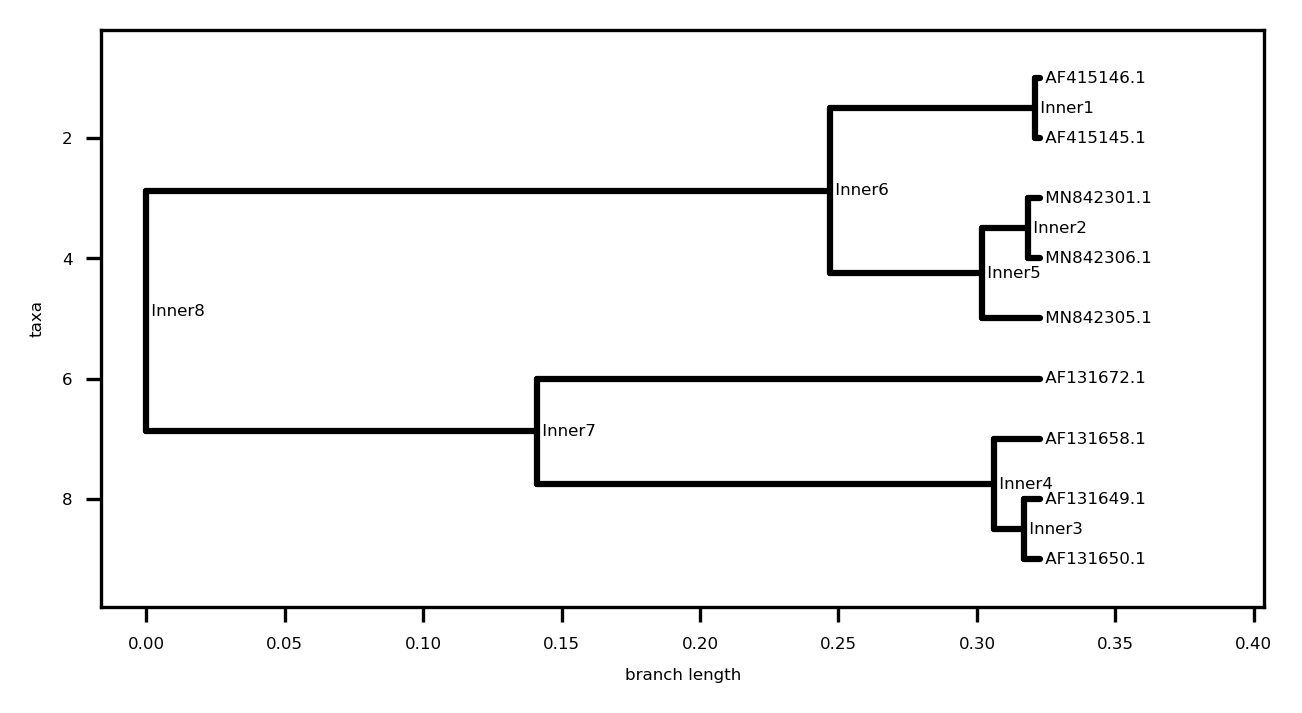

In [59]:
Phylo.draw(tree)

Since the names are not very informative, we will substitute the sequence description for the current names.

In [62]:
!head -n 1 tb1_zm.fasta

>MN842305.1 Zea mays subsp. mexicana cultivar EC889911 teosinte branched 1 (tb1) gene, complete cds


In [60]:
input_file = "tb1_zm.fasta"
sequences = SeqIO.parse(input_file, "fasta")
descriptions = {seq_record.id: seq_record.description for seq_record in sequences}

# Update tip labels with sequence descriptions
for leaf in tree.get_terminals():
    sequence_id = leaf.name
    if sequence_id in descriptions:
        leaf.name = descriptions[sequence_id]

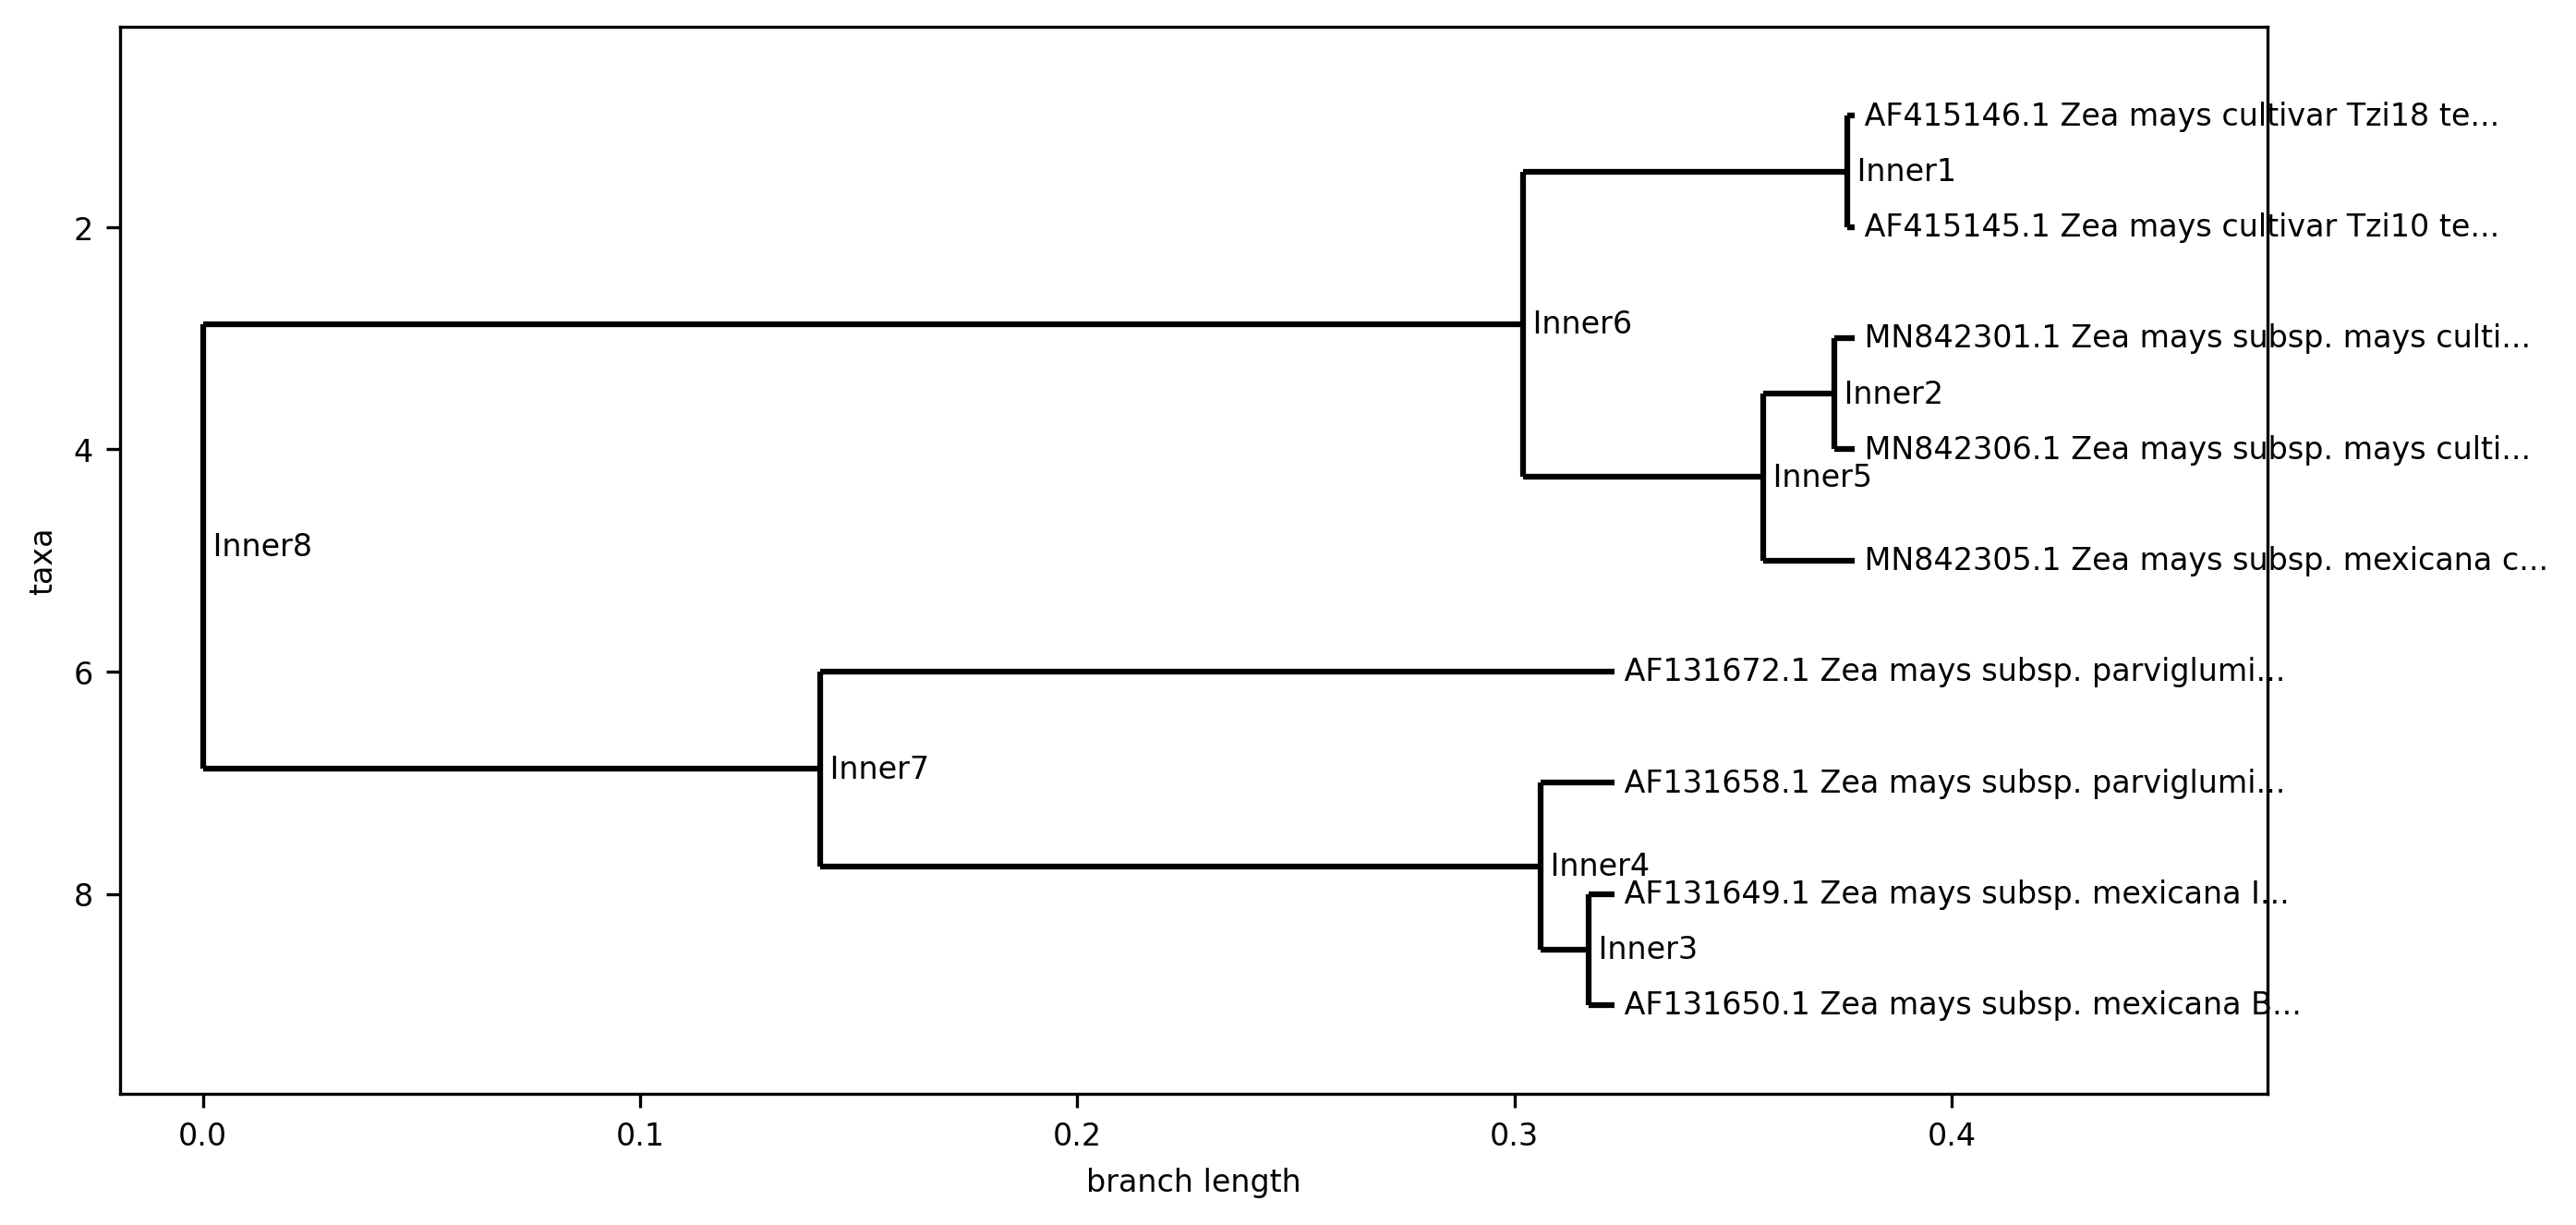

In [62]:
Phylo.draw(tree)

We can also save these to different formats:

In [ ]:
Phylo.write(tree, "tree_output.newick", "newick")
Phylo.write(tree, "tree_output.nex", "nexus")

There are options for making this figure better looking, including some basic MatPlotLib command (e.g., changing the figure size), but there are other packages out there that may be better (e.g., `etetoolkit`) that we do not have time to cover.